---
# Setup

* imports, 
* global constants (paths, time format, order of conditions)

---

In [1]:
# Imports and untilities from functions.ipynb

%run functions.ipynb

---
# Load Data

* load tracking data
* convert date time
* compute durations
* compute condition-based index
---

In [2]:
data_complete = pd.read_csv(rf'{export_data}data_all.csv', sep=";")

display(data_complete)

,Date,ProbandId,Block,Trial,TrialNumber,Condition,ResultNumber,ResultLayer,ProgramState,ProgramSubState,...,Layer03,Layer04,Layer05,Layer06,Layer07,file,SubStateChange,StateChange,TrialChange,StateChangeMarker
0,2022-08-01 13:58:38.416,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,NaN,NaN,NaN,START_BLOCK | START_TRAINING
1,2022-08-01 13:58:38.448,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
2,2022-08-01 13:58:38.477,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
3,2022-08-01 13:58:38.508,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
4,2022-08-01 13:58:38.541,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371627,2022-08-23 11:30:05.409,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
3371628,2022-08-23 11:30:05.440,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
3371629,2022-08-23 11:30:05.472,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
3371630,2022-08-23 11:30:05.503,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-


# Compute frametimes



,Date
0,NaN
1,32.0
2,29.0
3,31.0
4,33.0
...,...
3371627,31.0
3371628,31.0
3371629,32.0
3371630,31.0


,Date
count,3371631.00000
mean,30.03119
std,6.62419
min,0.00000
25%,30.00000
50%,31.00000
75%,32.00000
max,955.00000


,ProbandId,Block,Trial,TrialNumber,ProgramState,ProgramSubState,FrameStats
145647,2,3,11,74,4,1,101.0
147531,2,3,12,75,4,1,103.0
148672,2,3,13,76,4,1,107.0
151813,2,3,16,79,4,1,109.0
154482,2,3,18,81,4,1,133.0
...,...,...,...,...,...,...,...
3034493,21,1,20,41,4,1,117.0
3034571,21,1,20,41,4,1,107.0
3099470,22,-4,0,-8,3,0,708.0
3339288,23,2,17,59,4,1,110.0


390


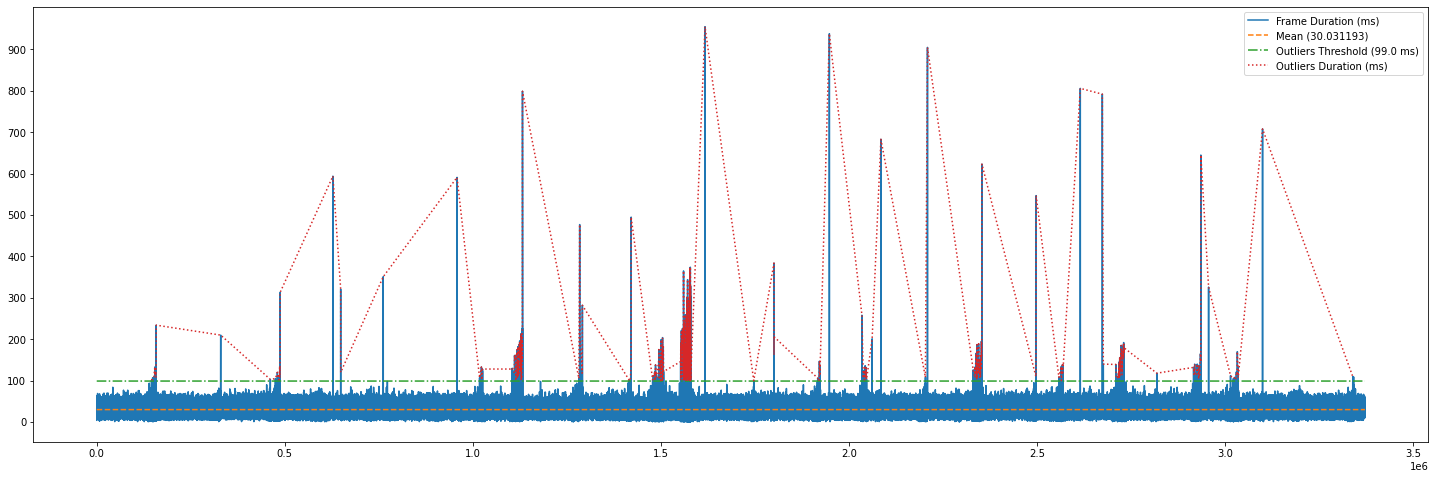

In [3]:
frameStats = pd.DataFrame(pd.to_datetime(data_complete["Date"]).diff().dt.microseconds / 1000.0)

display(frameStats)

desc_stats = frameStats.describe()

display(desc_stats.apply(lambda s: s.apply('{0:.5f}'.format)))

data_complete["FrameStats"] = frameStats

outliers_threshold = 99.0

outliers = data_complete[data_complete["FrameStats"] > outliers_threshold][["ProbandId", "Block", "Trial", "TrialNumber", "ProgramState", "ProgramSubState", "FrameStats"]]

display(outliers)
print(len(outliers))

y_mean = [desc_stats["Date"][1]] * len(frameStats)
outliers_threshold_line = [outliers_threshold] * len(frameStats)

fig,ax = plt.subplots(figsize=(25,8))

ax.plot(frameStats.index, frameStats["Date"], label='Frame Duration (ms)')
ax.plot(frameStats.index, y_mean, label=f'Mean ({format(desc_stats["Date"][1],"f")})', linestyle='--')
ax.plot(frameStats.index, outliers_threshold_line, label=f'Outliers Threshold ({outliers_threshold} ms)', linestyle='-.')

ax.plot(outliers.index, outliers["FrameStats"], label='Outliers Duration (ms)', linestyle=':')

legend = ax.legend(loc='upper right')

plt.yticks(np.arange(0, desc_stats["Date"][7], 100))


fig.savefig(rf'{export_img}frameTimes.png')
fig.savefig(rf'{export_img}frameTimes.svg')

plt.show()

,FrameStats
count,2688171.00000
mean,30.03014
std,6.50252
min,0.00000
25%,30.00000
50%,31.00000
75%,32.00000
max,374.00000


,ProbandId,Block,Trial,TrialNumber,ProgramState,ProgramSubState,FrameStats
145647,2,3,11,74,4,1,101.0
147531,2,3,12,75,4,1,103.0
148672,2,3,13,76,4,1,107.0
151813,2,3,16,79,4,1,109.0
154482,2,3,18,81,4,1,133.0
...,...,...,...,...,...,...,...
3034412,21,1,20,41,4,1,116.0
3034493,21,1,20,41,4,1,117.0
3034571,21,1,20,41,4,1,107.0
3339288,23,2,17,59,4,1,110.0


350


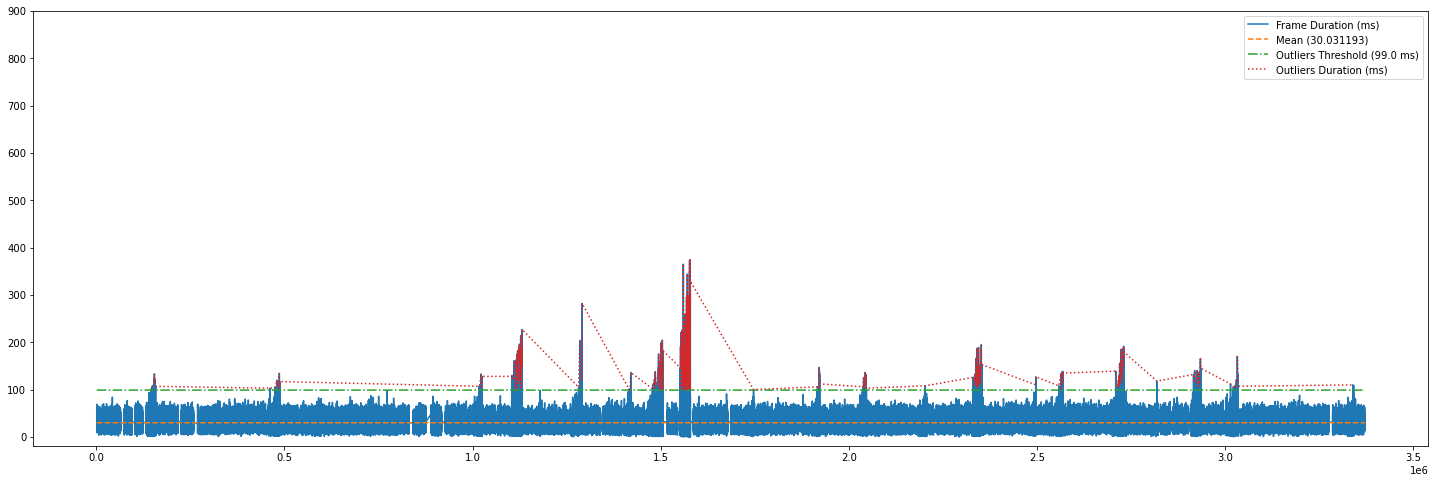

In [6]:
# data_complete['Date'] = pd.to_datetime(data_complete['Date'])

frameStats2 = data_complete[data_complete['ProgramSubState'] == 1]

desc_stats2 = pd.DataFrame(frameStats2['FrameStats'].describe())

display(desc_stats2.apply(lambda s: s.apply('{0:.5f}'.format)))

outliers_threshold = 99.0

outliers = frameStats2[frameStats2["FrameStats"] > outliers_threshold][["ProbandId", "Block", "Trial", "TrialNumber", "ProgramState", "ProgramSubState", "FrameStats"]]

display(outliers)
print(len(outliers))

y_mean = [desc_stats2["FrameStats"][1]] * len(frameStats2)
outliers_threshold_line = [outliers_threshold] * len(frameStats2)

fig,ax = plt.subplots(figsize=(25,8))

ax.plot(frameStats2.index, frameStats2["FrameStats"], label='Frame Duration (ms)')
ax.plot(frameStats2.index, y_mean, label=f'Mean ({format(desc_stats["Date"][1],"f")})', linestyle='--')
ax.plot(frameStats2.index, outliers_threshold_line, label=f'Outliers Threshold ({outliers_threshold} ms)', linestyle='-.')

ax.plot(outliers.index, outliers["FrameStats"], label='Outliers Duration (ms)', linestyle=':')

legend = ax.legend(loc='upper right')

plt.yticks(np.arange(0, desc_stats["Date"][7], 100))


fig.savefig(rf'{export_img}frameTimes_interactionOnly.png')
fig.savefig(rf'{export_img}frameTimes_interactionOnly.svg')

plt.show()

